In [62]:
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [63]:
from libcbm.test import casegeneration
from libcbm.test import simulator

In [64]:
cbm_defaults_db_path = 'D:\CODE\work_related\cbm_defaults\cbm_defaults.db'
libcbm_path = r'D:\CODE\work_related\LibCBM\LibCBM_Build\build\LibCBM\Release\LibCBM.dll'

In [65]:
case = casegeneration.create_scenario(
    id=1,
    age=20,
    area=1,
    delay=0,
    afforestation_pre_type=None,
    unfccc_land_class = "UNFCCC_FL_R_FL",
    admin_boundary = "British Columbia",
    eco_boundary ="Pacific Maritime",
    historic_disturbance = "Wildfire",
    last_pass_disturbance = "Wildfire",
    components=[
        {
            "species": "Spruce",
            "age_volume_pairs": [(0,0),(10,20),(50,100),(100,200),(300,300)]
        }
    ],
    events=[
        {"disturbance_type": "Deforestation", "time_step": 60},
        {"disturbance_type": "Wildfire", "time_step": 20}])

In [66]:
result = simulator.run_libCBM(
    dllpath=libcbm_path,
    dbpath=cbm_defaults_db_path,
    cases=[case],
    nsteps=100)

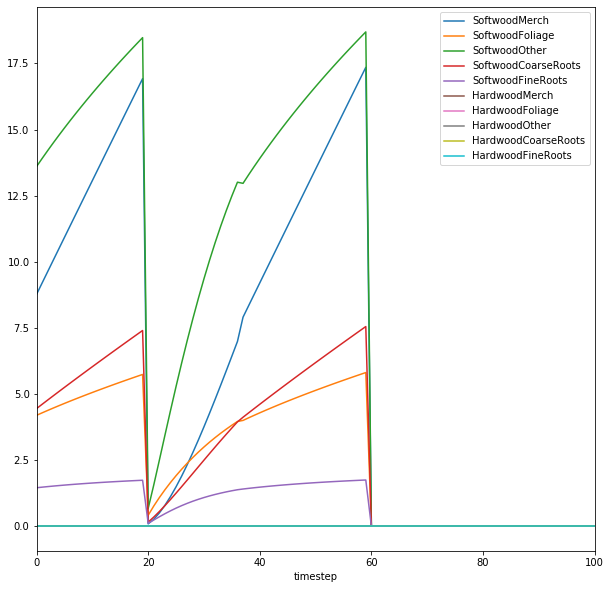

In [67]:
pools = result["pools"]
pools[["timestep",'SoftwoodMerch','SoftwoodFoliage','SoftwoodOther',
       'SoftwoodCoarseRoots','SoftwoodFineRoots','HardwoodMerch',
       'HardwoodFoliage','HardwoodOther','HardwoodCoarseRoots',
       'HardwoodFineRoots',]].groupby("timestep").sum().plot(figsize=(10,10))

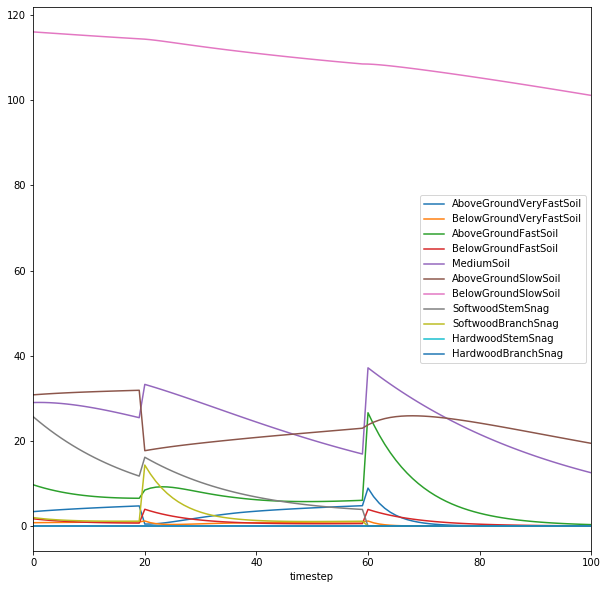

In [68]:
pools[["timestep",'AboveGroundVeryFastSoil', 'BelowGroundVeryFastSoil',
       'AboveGroundFastSoil', 'BelowGroundFastSoil', 'MediumSoil',
       'AboveGroundSlowSoil', 'BelowGroundSlowSoil', 'SoftwoodStemSnag',
       'SoftwoodBranchSnag', 'HardwoodStemSnag', 'HardwoodBranchSnag']] \
    .groupby("timestep").sum().plot(figsize=(10,10))

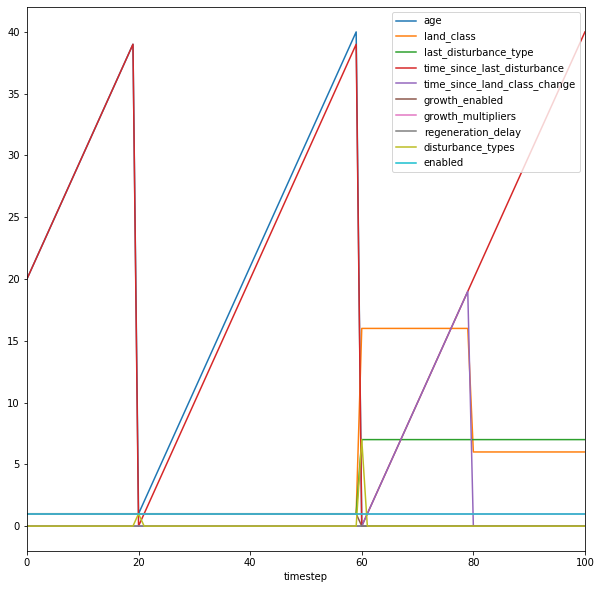

In [71]:
state_variables = result["state_variable_result"]
state_variables[['timestep', 'age', 'land_class', 'last_disturbance_type', 
                 'time_since_last_disturbance', 'time_since_land_class_change',
                 'growth_enabled', 'growth_multipliers', 'regeneration_delay',
                 'disturbance_types', 'enabled']].groupby("timestep").sum().plot(figsize=(10,10))

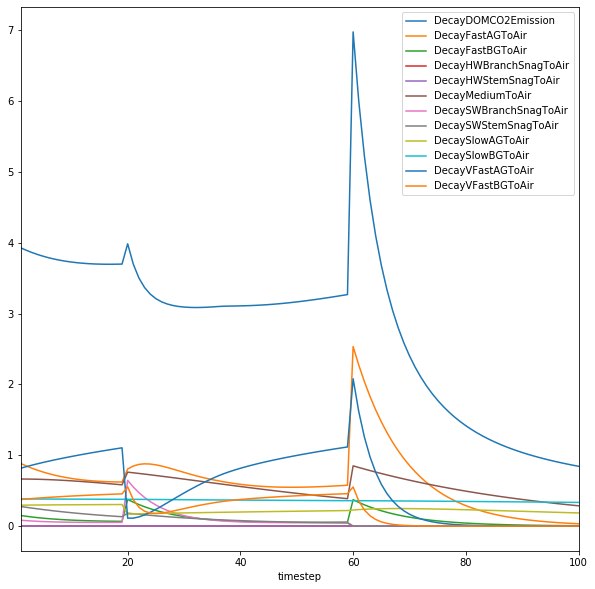

In [81]:
flux = result['flux']
flux[['timestep', 'DecayDOMCO2Emission', 'DecayFastAGToAir', 'DecayFastBGToAir',
      'DecayHWBranchSnagToAir', 'DecayHWStemSnagToAir', 'DecayMediumToAir',
      'DecaySWBranchSnagToAir', 'DecaySWStemSnagToAir', 'DecaySlowAGToAir',
      'DecaySlowBGToAir', 'DecayVFastAGToAir', 'DecayVFastBGToAir']] \
    .groupby("timestep").sum().plot(figsize=(10,10))

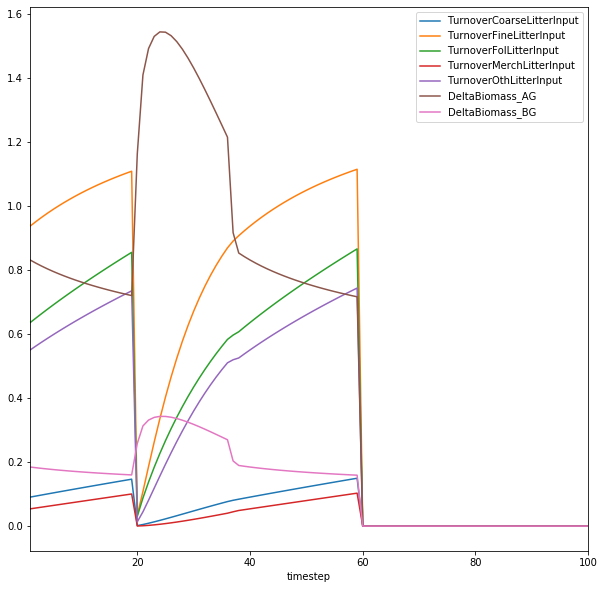

In [83]:
flux = result['flux']
flux[['timestep', 'TurnoverCoarseLitterInput', 'TurnoverFineLitterInput', 'TurnoverFolLitterInput',
 'TurnoverMerchLitterInput', 'TurnoverOthLitterInput', 'DeltaBiomass_AG', 'DeltaBiomass_BG',]] \
    .groupby("timestep").sum().plot(figsize=(10,10))

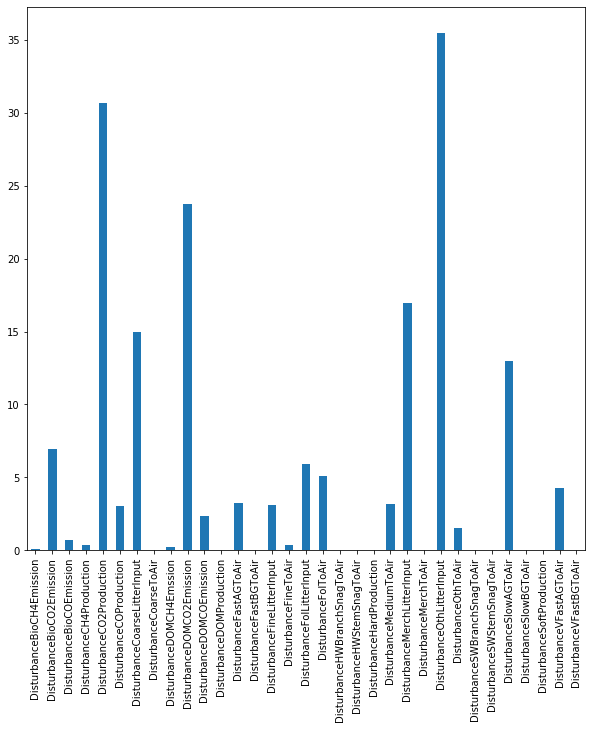

In [88]:
flux = result['flux']
flux[['DisturbanceBioCH4Emission', 'DisturbanceBioCO2Emission', 
      'DisturbanceBioCOEmission', 'DisturbanceCH4Production', 'DisturbanceCO2Production',
      'DisturbanceCOProduction', 'DisturbanceCoarseLitterInput', 'DisturbanceCoarseToAir',
      'DisturbanceDOMCH4Emssion', 'DisturbanceDOMCO2Emission', 'DisturbanceDOMCOEmission',
      'DisturbanceDOMProduction', 'DisturbanceFastAGToAir', 'DisturbanceFastBGToAir',
      'DisturbanceFineLitterInput', 'DisturbanceFineToAir', 'DisturbanceFolLitterInput',
      'DisturbanceFolToAir', 'DisturbanceHWBranchSnagToAir', 'DisturbanceHWStemSnagToAir',
      'DisturbanceHardProduction', 'DisturbanceMediumToAir', 'DisturbanceMerchLitterInput',
      'DisturbanceMerchToAir', 'DisturbanceOthLitterInput', 'DisturbanceOthToAir',
      'DisturbanceSWBranchSnagToAir', 'DisturbanceSWStemSnagToAir', 'DisturbanceSlowAGToAir',
      'DisturbanceSlowBGToAir', 'DisturbanceSoftProduction', 'DisturbanceVFastAGToAir',
      'DisturbanceVFastBGToAir']].sum().plot(kind="bar",figsize=(10,10))